# Running Main

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config = {
    
    'tracking': {

        'user_context'  : 'CPU',
        'collider_path' : '../001_configure_collider/zfruits/collider_001.json',

        'sequence': 'lhcb1',
        'n_parts' : 100,
        'n_turns' : 1e3},


    'monitor':{

        'start_at_turn'    : 0,
        'stop_at_turn'     : 'n_turns',
        'n_repetitions'    : 1,
        'repetition_period': 1}}




# Loading collider
print('LOADING COLLIDER')
collider,context = main.load_collider(  collider_path = config['tracking']['collider_path'],
                                        user_context  = config['tracking']['user_context'])

# Parsing config
sequence = config['tracking']['sequence']
line    = collider[sequence]
n_parts = int(config['tracking']['n_parts'])
n_turns = int(config['tracking']['n_turns'])
#----------------------------------


# Generating particle distribution
#----------------------------------
# Extracting emittance from previous config
config_bb = main.read_configuration('../001_configure_collider/config.yaml')
beam = sequence[-2:]
bunch_number = config_bb['config_collider']['config_beambeam']['mask_with_filling_pattern'][f'i_bunch_{beam}'] 
nemitt_x,nemitt_y = (config_bb['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------


# Tracking
#----------------------------------
print('START TRACKING...')
tracked = xPlus.Tracking_Interface( line      = line,
                                    particles = particles,
                                    n_turns   = n_turns,
                                    method    ='6D',
                                    progress  = True,
                                    rebuild   = False,
                                    monitor   = None,
                                    skip_extraction = False,
                                    _context   = context)

# Saving emittance:
tracked.nemitt_x    = nemitt_x
tracked.nemitt_y    = nemitt_y
tracked.nemitt_zeta = 1#nemitt_zeta

#----------------------------------


# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()
    

parquet_path = config['tracking']['tracking_path']
bunch_ID     = str(bunch_number).zfill(4)
print(f'SAVING TO PARQUET... -> {parquet_path}')
# Setting Bunch number for partitionning
tracked.to_parquet(parquet_path,partition_name='BUNCH',partition_ID=bunch_ID)
#----------------------------------



LOADING COLLIDER
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


963acf63eeb645899e69581463632879.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
963acf63eeb645899e69581463632879.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
963acf63eeb645899e69581463632879.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
963acf63eeb645899e69581463632879.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
963acf63eeb645899e69581463632879.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
963acf63eeb645899e69581463632879.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


2190267ed916414aa5429695a3a18da9.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2190267ed916414aa5429695a3a18da9.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2190267ed916414aa5429695a3a18da9.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
2190267ed916414aa5429695a3a18da9.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
2190267ed916414aa5429695a3a18da9.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
2190267ed916414aa5429695a3a18da9.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ea8bc03d876e4f738ce5ddb6f22e4ff4.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
ea8bc03d876e4f738ce5ddb6f22e4ff4.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


f3592b4cd0bb4cbfb1080d38abd5bbde.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
f3592b4cd0bb4cbfb1080d38abd5bbde.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
GENERATING PARTICLES
START TRACKING...


Output()

SAVING TO PARQUET...


In [23]:
bunch = 224
str(bunch).zfill(4)

'0224'

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config_bb = main.read_configuration('../001_configure_collider/config.yaml')

In [19]:
sequence = 'lhcb1'

In [21]:

beam

'b1'

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst


test = xPlus.Tracking_Interface.from_parquet('zfruits/tracking',partition_name='BUNCH',partition_ID='0224')

In [8]:
test.df_sig.groupby('turn').get_group(0).x_sig.max()

10.000000047597021

(0.3, 0.35)

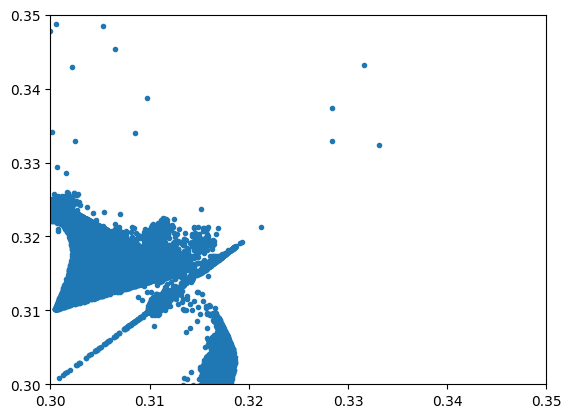

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(test.tunes.Qx,test.tunes.Qy,'.')
plt.xlim([0.3,0.35])
plt.ylim([0.3,0.35])

In [8]:
data_path = 'zfruits/test_tracked'
partition_name = 'BUNCH'
partition_ID = '0001'

meta_path = f'{data_path}/{partition_name}={partition_ID}/meta_data.json'

import json
with open(meta_path , "r") as file: 
    metadata = json.load(file)

Particles(_capacity=1, _num_active_particles=1, _num_lost_particles=0, start_tracking_at_element=-1, q0=1.0, mass0=938272088.16, _p0c=[6.79999994e+12], _gamma0=[7247.36468857], _beta0=[0.99999999], s=[0.], zeta=[1.21249509e-06], _ptau=[1.02868299e-06], _delta=[1.028683e-06], _rpp=[0.99999897], _rvv=[1.], chi=[1.], charge_ratio=[1.], weight=[1.], particle_id=[0], at_element=[0], at_turn=[0], state=[1], parent_particle_id=[0], _rng_s1=[0], _rng_s2=[0], _rng_s3=[0], _rng_s4=[0], x=[-5.11114889e-07], y=[-4.85854601e-08], px=[-7.61359513e-09], py=[-7.99225605e-10])

In [10]:
xp.Particles.from(metadata['particle_on_co'])

TypeError: '<=' not supported between instances of 'dict' and 'int'

In [5]:
tracked.df.x.values

NameError: name 'tracked' is not defined

In [2]:
tracked.to_parquet('zfruits/test_tracked',partition_name='BUNCH',partition_ID='0002')

In [3]:
tracked.to_parquet('zfruits/test_tracked',partition_name='BUNCH',partition_ID='0003')

In [5]:
import dask.dataframe as dd

In [50]:
def from_parquet(data_path,partition_name=None,partition_ID=None,variables = None):

    # Checking input
    #-----------------------------
    if variables is not None:
        if partition_name not in variables:
            variables = [partition_name] + variables
    #-----------------------------

    # Importing the data
    #-----------------------------
    if partition_ID is not None:
        assert (partition_name is None) == (partition_ID is None), 'partition_name and partition_ID must be both None or both not None'
        _partition = dd.read_parquet(data_path + f'/{partition_name}={partition_ID}',columns=variables,parquet_file_extension = '.parquet')
    else:
        _partition = dd.read_parquet(data_path,columns=variables,parquet_file_extension = '.parquet')
    #-----------------------------

    # Cleaning up the dataframe
    #-----------------------------
    df        = _partition.compute()
    if partition_name is not None:
        df = df.set_index(partition_name).reset_index()
    else:
        df = df.reset_index(drop=True)
    #-----------------------------


    # Removing raw data
    #-----------------------------
    del(_partition)
    gc.collect()
    #-----------------------------



    return df

test = from_parquet('zfruits/test_tracked',partition_name='BUNCH')

In [53]:
reloaded

NameError: name 'reloaded' is not defined

In [52]:
test

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [31]:
test.reset_index(drop=True)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,BUNCH
0,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3,1
1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3,1
2,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3,1
3,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3,1
4,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3,1
...,...,...,...,...,...,...,...,...,...,...,...
316216,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3,3
316217,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3,3
316218,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3,3
316219,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3,3


In [24]:
test.reset_index(drop=True).set_index('BUNCH').reset_index()

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [23]:
test.set_index('BUNCH').reset_index()

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [3]:
tracked.to_parquet('zfruits/test_tracked')

In [4]:
tracked.to_parquet('zfruits/test_tracked',partition_ID='0002')

In [29]:
metadata = {'partition_name'  : tracked.partition_name,
            'partition_ID'    : tracked.partition_ID,
            'n_turns'         : tracked.n_turns,
            'n_parts'         : tracked.n_parts,
            'nemitt_x'        : tracked.nemitt_x,
            'nemitt_y'        : tracked.nemitt_y,
            'nemitt_zeta'     : tracked.nemitt_zeta,
            'method'          : tracked.method,
            'W_matrix'        : tracked.W_matrix,
            'particle_on_co'  : tracked.particle_on_co.to_dict()}

metadata

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': array([[ 1.08844573e+01,  1.33296158e-15,  6.97171403e-01,
          5.97694873e-01,  1.54548054e-03, -1.91776185e-02],
        [-2.12426579e-01,  9.11844840e-02, -1.88126448e-02,
         -5.35390855e-03, -4.18905030e-05, -2.43557752e-04],
        [-1.00698520e+00,  7.86231411e-01,  1.44610546e+01,
          1.77096842e-15, -1.51941353e-03,  4.01964387e-04],
        [-1.57287742e-02,  4.82518684e-03,  1.70139702e-01,
          6.86318114e-02, -6.01840419e-06,  3.49302921e-06],
        [ 1.89053980e-01, -4.92044944e-02,  1.54241703e-02,
          7.75651871e-03,  2.81244154e+01,  3.44424753e-15],
        [-6.20009878e-06, -4.65113575e-06,  6.00954010e-06,
          3.07132224e-06, -1.52695451e-04,  3.55563367e-02]]),
 'particle_on_co': {'start_tracking_at_element': -1,
  'q0': 1.0,
  'mass0': 938272088.16,
 

In [27]:
tracked.particle_on_co.to_dict()

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.16,
 's': array([0.]),
 'zeta': array([1.21249509e-06]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([-5.11114889e-07]),
 'y': array([-4.85854601e-08]),
 'px': array([-7.61359513e-09]),
 'py': array([-7.99225605e-10]),
 'delta': LinkedArrayCpu([1.028683e-06]),
 'ptau': LinkedArrayCpu([1.02868299e-06]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([0.99999897]),
 'p0c': array([6.79999994e+12]),
 'beta0': array([0.99999999]),
 'gamma0': array([7247.36468857])}

In [19]:
filename = 'zfruits/test_tracked/'

In [55]:
import json
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
meta_path = Path(filename)/f'{tracked.partition_name}={tracked.partition_ID}/meta_data.json'
with open(meta_path , "w") as outfile: 
    json.dump(metadata, outfile,cls=NpEncoder)
meta_path

NameError: name 'filename' is not defined

In [56]:
with open(meta_path , "r") as file: 
    reloaded = json.load(file)

NameError: name 'meta_path' is not defined

In [35]:
reloaded

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': [[10.884457267157153,
   1.3329615752680155e-15,
   0.6971714030413895,
   0.5976948734504779,
   0.001545480544216127,
   -0.019177618475960532],
  [-0.21242657920188585,
   0.09118448402165638,
   -0.018812644807451526,
   -0.005353908548914938,
   -4.189050297355186e-05,
   -0.00024355775183372853],
  [-1.0069851999805668,
   0.7862314109953182,
   14.461054569797165,
   1.7709684191197302e-15,
   -0.001519413525220451,
   0.00040196438657913615],
  [-0.015728774234672976,
   0.004825186837792555,
   0.17013970175919715,
   0.06863181139574234,
   -6.018404190982346e-06,
   3.493029214776582e-06],
  [0.1890539796186471,
   -0.04920449443727543,
   0.01542417034840071,
   0.007756518714561939,
   28.124415397969976,
   3.4442475295014466e-15],
  [-6.2000987821288525e-06,
   -4.651135746876567e-06,
   6.009

In [34]:
metadata

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': array([[ 1.08844573e+01,  1.33296158e-15,  6.97171403e-01,
          5.97694873e-01,  1.54548054e-03, -1.91776185e-02],
        [-2.12426579e-01,  9.11844840e-02, -1.88126448e-02,
         -5.35390855e-03, -4.18905030e-05, -2.43557752e-04],
        [-1.00698520e+00,  7.86231411e-01,  1.44610546e+01,
          1.77096842e-15, -1.51941353e-03,  4.01964387e-04],
        [-1.57287742e-02,  4.82518684e-03,  1.70139702e-01,
          6.86318114e-02, -6.01840419e-06,  3.49302921e-06],
        [ 1.89053980e-01, -4.92044944e-02,  1.54241703e-02,
          7.75651871e-03,  2.81244154e+01,  3.44424753e-15],
        [-6.20009878e-06, -4.65113575e-06,  6.00954010e-06,
          3.07132224e-06, -1.52695451e-04,  3.55563367e-02]]),
 'particle_on_co': {'start_tracking_at_element': -1,
  'q0': 1.0,
  'mass0': 938272088.16,
 

In [24]:
tracked.particle_on_co.to_json()

AttributeError: 'Particles' object has no attribute 'to_json'

In [15]:
tracked.W_matrix.tolist()

[[10.884457267157153,
  1.3329615752680155e-15,
  0.6971714030413895,
  0.5976948734504779,
  0.001545480544216127,
  -0.019177618475960532],
 [-0.21242657920188585,
  0.09118448402165638,
  -0.018812644807451526,
  -0.005353908548914938,
  -4.189050297355186e-05,
  -0.00024355775183372853],
 [-1.0069851999805668,
  0.7862314109953182,
  14.461054569797165,
  1.7709684191197302e-15,
  -0.001519413525220451,
  0.00040196438657913615],
 [-0.015728774234672976,
  0.004825186837792555,
  0.17013970175919715,
  0.06863181139574234,
  -6.018404190982346e-06,
  3.493029214776582e-06],
 [0.1890539796186471,
  -0.04920449443727543,
  0.01542417034840071,
  0.007756518714561939,
  28.124415397969976,
  3.4442475295014466e-15],
 [-6.2000987821288525e-06,
  -4.651135746876567e-06,
  6.009540103171484e-06,
  3.0713222404712785e-06,
  -0.00015269545057773986,
  0.03555633667443991]]

In [37]:
tracked.df.to_parquet('zfruits/test_tracked',   partition_cols         = ['BUNCH'],
                                                existing_data_behavior = 'delete_matching',
                                                basename_template      = 'tracked_{i}.parquet')

# tracked.coordinates.to_parquet('zfruits/test_tracked',   partition_cols         = ['BUNCH'],
#                                                 basename_template      = 'coordinates_{i}.parquet')

In [40]:
tracked.df.groupby('turn').get_group(0).drop(columns=['turn'])

,BUNCH,Bunch,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0001,BUNCH_0001,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1000,0001,BUNCH_0001,1,0.000196,-2.490697e-06,-0.000007,4.985300e-07,0.000004,0.000001,1,0
2000,0001,BUNCH_0001,2,0.000443,-8.009597e-06,-0.000035,6.659106e-06,0.000009,0.000001,1,0
3000,0001,BUNCH_0001,3,0.000571,-1.116683e-05,-0.000053,-8.270651e-07,0.000011,0.000001,1,0
4000,0001,BUNCH_0001,4,0.000803,-1.425784e-05,-0.000062,3.698365e-06,0.000014,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...
102013,0001,BUNCH_0001,105,0.000077,7.062004e-08,0.001282,1.693940e-05,0.000002,0.000001,1,0
103013,0001,BUNCH_0001,106,0.000104,-1.512600e-06,0.001526,2.147544e-05,0.000003,0.000001,1,0
104013,0001,BUNCH_0001,107,0.000085,-2.313573e-06,0.001773,2.085407e-05,0.000003,0.000001,1,0
105013,0001,BUNCH_0001,108,0.000180,-1.385530e-06,0.002043,3.343504e-05,0.000003,0.000001,1,0


In [32]:
tracked.particle_on_co.to_dict()

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.16,
 's': array([0.]),
 'zeta': array([1.21249509e-06]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([-5.11114889e-07]),
 'y': array([-4.85854601e-08]),
 'px': array([-7.61359513e-09]),
 'py': array([-7.99225605e-10]),
 'delta': LinkedArrayCpu([1.028683e-06]),
 'ptau': LinkedArrayCpu([1.02868299e-06]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([0.99999897]),
 'p0c': array([6.79999994e+12]),
 'beta0': array([0.99999999]),
 'gamma0': array([7247.36468857])}

In [45]:
_twiss = line.twiss(method='6d')

In [54]:
len(tracked.extract_columns)

10

In [55]:
self = tracked

In [60]:
self.df.loc[:,'at_element'] = self.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx])

In [61]:
self.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,at_element_name
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,ip3,ip3
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,ip3,ip3
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,ip3,ip3
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,ip3,ip3
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,ip3,ip3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,ip3,ip3
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,ip3,ip3
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,ip3,ip3
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,ip3,ip3


In [57]:
self.df.insert(len(self.df.columns),'at_element_name',self.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx]))

In [59]:
self.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,at_element_name
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0,ip3
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0,ip3
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0,ip3
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0,ip3
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0,ip3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0,ip3
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0,ip3
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0,ip3
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0,ip3


In [51]:
len(tracked.df.columns)

12

In [50]:
tracked.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx])

0         ip3
1         ip3
2         ip3
3         ip3
4         ip3
         ... 
107008    ip3
107009    ip3
107010    ip3
107011    ip3
107012    ip3
Name: at_element, Length: 107013, dtype: object

In [49]:
line.element_names

('ip3',
 'drift_0',
 'mcbwv.4r3.b1_entry',
 'mcbwv.4r3.b1',
 'mcbwv.4r3.b1_exit',
 'drift_1',
 'bpmw.4r3.b1_entry',
 'bpmw.4r3.b1',
 'bpmw.4r3.b1_exit',
 'drift_2',
 'mqwa.a4r3.b1..1_entry',
 'mqwa.a4r3.b1..1',
 'mqwa.a4r3.b1..1_exit',
 'drift_3',
 'mqwa.a4r3.b1..2_entry',
 'mqwa.a4r3.b1..2',
 'mqwa.a4r3.b1..2_exit',
 'drift_4',
 'mqwa.a4r3.b1..3_entry',
 'mqwa.a4r3.b1..3',
 'mqwa.a4r3.b1..3_exit',
 'drift_5',
 'mqwa.a4r3.b1..4_entry',
 'mqwa.a4r3.b1..4',
 'mqwa.a4r3.b1..4_exit',
 'drift_6',
 'mqwa.a4r3.b1..5_entry',
 'mqwa.a4r3.b1..5',
 'mqwa.a4r3.b1..5_exit',
 'drift_7',
 'mqwa.a4r3.b1..6_entry',
 'mqwa.a4r3.b1..6',
 'mqwa.a4r3.b1..6_exit',
 'drift_8',
 'mqwa.a4r3.b1..7_entry',
 'mqwa.a4r3.b1..7',
 'mqwa.a4r3.b1..7_exit',
 'drift_9',
 'mqwa.a4r3.b1..8_entry',
 'mqwa.a4r3.b1..8',
 'mqwa.a4r3.b1..8_exit',
 'drift_10',
 'mqwa.a4r3.b1..9_entry',
 'mqwa.a4r3.b1..9',
 'mqwa.a4r3.b1..9_exit',
 'drift_11',
 'mqwa.a4r3.b1..10_entry',
 'mqwa.a4r3.b1..10',
 'mqwa.a4r3.b1..10_exit',
 'drift_12',

In [44]:
_twiss

NameError: name '_twiss' is not defined

In [42]:
tracked.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0


In [62]:
metadata = {partition_name  : tracked.partition_name,
            partition_ID    : tracked.partition_ID,
            n_turns         : tracked.n_turns,
            n_parts         : tracked.n_parts,
            nemitt_x        : tracked.nemitt_x,
            nemitt_y        : tracked.nemitt_y,
            nemitt_zeta     : tracked.nemitt_zeta,
            method          : tracked.method,
            W_matrix        : tracked.W_matrix,
            particle_on_co  : tracked.particle_on_co.to_dict()}

metadata

AttributeError: 'Tracking_Interface' object has no attribute 'n_parts'

In [15]:
tracked.df.insert(0,'BUNCH','0001')

In [13]:
tracked.df

,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0
2,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0
3,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0
4,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...
107008,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0
107009,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0
107010,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0
107011,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0


In [4]:
import rich

In [10]:
rich.inspect(tracked.particle_on_co,all=False)

╭───────────────────────────────── <class 'xpart.particles.particles.Particles'> ─────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ Particles(_capacity=1, _num_active_particles=1, _num_lost_particles=0, start_tracking_at_element=-1,        │ │
│ │ q0=1.0, mass0=938272088.16, _p0c=[6.79999994e+12], _gamma0=[7247.36468857], _beta0=[0.99999999], s=[0.],    │ │
│ │ zeta=[1.21249509e-06], _ptau=[1.02868299e-06], _delta=[1.028683e-06], _rpp=[0.99999897], _rvv=[1.],         │ │
│ │ chi=[1.], charge_ratio=[1.], weight=[1.], particle_id=[0], at_element=[0], at_turn=[0], state=[1],          │ │
│ │ parent_particle_id=[0], _rng_s1=[0], _rng_s2=[0], _rng_s3=[0], _rng_s4=[0], x=[-5.11114889e-07],            │ │
│ │ y=[-4.85854601e-08], px=[-7.61359513e-09], py=[-7.99225605e-10])                                            │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                at_element = array([0])                                                                          │
│                   at_turn = array([0])                                                                          │
│                     beta0 = LinkedArrayCpu([0.99999999])                                                        │
│              charge_ratio = array([1.])                                                                         │
│                       chi = array([1.])                                                                         │
│                     delta = LinkedArrayCpu([1.028683e-06])                                                      │
│                    energy = LinkedArrayCpu([6.800007e+12])                                                      │
│                   energy0 = LinkedArrayCpu([6.8e+12])                                                           │
│             extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')      │
│                    gamma0 = LinkedArrayCpu([7247.36468857])                                                     │
│ lost_particles_are_hidden = False                                                                               │
│                     mass0 = 938272088.16                                                                        │
│                       p0c = LinkedArrayCpu([6.79999994e+12])                                                    │
│        parent_particle_id = array([0])                                                                          │
│          part_energy_vars = ((Float64, 'ptau'), (Float64, 'delta'), (Float64, 'rpp'), (Float64, 'rvv'))         │
│               particle_id = array([0])                                                                          │
│         per_particle_vars = (                                                                                   │
│                                 (Float64, 'p0c'),                                                               │
│                                 (Float64, 'gamma0'),                                                            │
│                                 (Float64, 'beta0'),                                                             │
│                                 (Float64, 's'),                                                                 │
│                                 (Float64, 'zeta'),                                                              │
│                                 (Float64, 'ptau'),                                                              │
│                                 (Float64, 'delta'),                                                             │
│                                 (Float64, 'rpp'),     

In [ ]:

# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()
    
print('SAVING TO PICKLES...')
tracked.to_pickle('zfruits/test_tracked.pkl')
#----------------------------------

In [ ]:
tracked.context = None

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracked.df_sig.x_sig,tracked.df_sig.y_sig,'.')

In [ ]:
final.groupby('turn').get_group(0).x_n.max()/(np.sqrt(1.8e-6/7300))

In [ ]:
tracked.nemitt_x

In [ ]:
import rich
rich.inspect(tracked.particle_on_co)

In [ ]:
_twiss = line.twiss(method='6d')
W_matrix       = _twiss.W_matrix[0]
particle_on_co = _twiss.particle_on_co

In [ ]:
particle_on_co.to_pandas()[['x','y','px','py']]

In [ ]:
tracked.particle_on_co.to_pandas()[['x','y','px','py']]

In [ ]:
tracked.df_n

In [ ]:
tracked.df

---
# Particle coordinates
---

In [ ]:

# ==================================================================================================
# --- Functions to read configuration files and generate configuration files for orbit correction
# ==================================================================================================
import ruamel.yaml
ryaml = ruamel.yaml.YAML()
def read_configuration(config_path="config.yaml"):
    # Read configuration for simulations
    with open(config_path, "r") as fid:
        config = ryaml.load(fid)


    return config

config = read_configuration('../001_configure_collider/config.yaml')

In [ ]:
emittx,emitty = (config['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])

In [ ]:
emitty

In [ ]:
n_r     = int(np.floor(np.sqrt(20e3)))
n_theta = n_part//n_r  +1
n_r,n_theta,n_r*n_theta

In [ ]:
momentum    = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))

In [ ]:
momentum.sample(frac=1)

In [ ]:

ID

In [ ]:
momentum    = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))

# Shuffling momentum
#-----------------------
ID = list(momentum.index)
np.random.shuffle(ID)
momentum = momentum.loc[ID,['x_sig','y_sig']].reset_index(drop=True).rename(columns={'x_sig':'px_sig','y_sig':'py_sig'})
#-----------------------

momentum

In [ ]:




def generate_particles(n_part = 1000,force_n_part = False,line = None,_context = None):
    # Generating Coord grid
    #=========================================================
    nemitt_x,nemitt_y = (config['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])

    n_part  = int(n_part)
    n_r     = int(np.floor(np.sqrt(n_part)))
    n_theta = int(n_part//n_r + 1)
    coordinates = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))
    
    momentum  = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))
    
    # Shuffling momentum
    #-----------------------
    ID = list(momentum.index)
    np.random.shuffle(ID)
    momentum = momentum.loc[ID,['x_sig','y_sig']].reset_index(drop=True).rename(columns={'x_sig':'px_sig','y_sig':'py_sig'})
    #-----------------------

    coordinates = pd.concat([coordinates,momentum],axis=1)
    # coordinates.insert(0,'delta',0)
    

    if force_n_part:
        coordinates = coordinates[:n_part]

    if line is not None:
        particles = xp.build_particles(  line   = line,
                                        x_norm  =coordinates.x_sig.values,
                                        px_norm =coordinates.px_sig.values,
                                        y_norm  =coordinates.y_sig.values,
                                        py_norm =coordinates.py_sig.values,
                                        nemitt_x=nemitt_x, nemitt_y=nemitt_y,
                                        _context=_context)
    else:
        particles = None


    
    return particles,coordinates



particles,coordinates = generate_particles(20e3,line=collider[seq],force_n_part=True)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(coordinates.x_sig,coordinates.px_sig,'.')
plt.axis('square')

# Tracking test

In [ ]:
particles

In [ ]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles

n_sigmas = 10
n_part   = int(20e3)
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)



# num_turns = int(1e2)
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

# monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
# collider[seq].discard_tracker()
# for ee_name,monitor in monitor_TCP.items():
#     monitor.allow_backtrack=False
#     collider[seq].insert_element(index=ee_name, element=monitor, name=ee_name+'_monitor')
# collider[seq].build_tracker(_context=context)





# # Tracking
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 1000,
                                    method    ='6D',
                                    skip_extraction = False,
                                    progress  = False,
                                    saveVars  = False,
                                    rebuild   = True,
                                    monitor   = None,
                                    context   = context)




# tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='4d',progress=True,saveVars = False)

# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
# tracked.df.groupby('turn').count()
# tracked.df.groupby('at_element').count()


In [ ]:
import rich

In [ ]:
rich.inspect(tracked)

In [ ]:
from rich.progress import Progress, BarColumn, TextColumn,TimeElapsedColumn,SpinnerColumn,TimeRemainingColumn
import time


class test_spinner():

    def __init__(self,):
        # Progress info
        #-------------------------
        self.progress  = False
        self._plive    = None
        self._pstatus  = None
        #-------------------------

        try:
            self.main_test()
        except KeyboardInterrupt:
            self.closeLiveDisplay()

    def main_test(self,):
        self.startSpinner()
        time.sleep(3)  
        self.closeLiveDisplay()


        # Progress bar methods
    #=============================================================================
    def startProgressBar(self,):
        self._plive = Progress("{task.description}",
                                TextColumn("[progress.remaining] ["),TimeRemainingColumn(),TextColumn("[progress.remaining]remaining ]   "),
                                SpinnerColumn(),
                                BarColumn(bar_width=40),
                                TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),
                                TimeElapsedColumn())

        self._plive.start()
        self._plive.live._disable_redirect_io()

        self._pstatus = self._plive.add_task("[blue]Tracking\n", total=self.n_turns)
    
    def updateProgressBar(self,):
        self._plive.update(self._pstatus, advance=1,update=True)

        
    def startSpinner(self,):
        self._plive = Progress("{task.description}",
                                SpinnerColumn('aesthetic'),
                                TextColumn("[progress.elapsed] ["),TimeElapsedColumn (),TextColumn("[progress.elapsed]elapsed ]   "))

        self._plive.start()
        self._plive.live._disable_redirect_io()

        self._pstatus = self._plive.add_task("[blue]Tracking")


    def closeLiveDisplay(self,):
        self._plive.refresh()
        self._plive.stop()
        self._plive.console.clear_live()


test_spinner()

In [ ]:
2+2

In [ ]:
part.to_pandas()

In [ ]:
n_sigmas = 10
n_part   = int(20e3)
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part2 = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)

In [ ]:
test = part2.to_pandas()[['x','px','y','py','zeta','ptau','beta0']].copy(deep=True)
test.insert(5,'pzeta',test['ptau']/test['beta0'])
test

In [ ]:
test

In [ ]:
test.index.name = 'particle'


In [ ]:
list(test.columns).index('zeta')

In [ ]:
test.insert(list(test.columns).index('zeta')+1,'pzeta',test['ptau']/test['beta0'])

In [ ]:
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 100,
                                    method    ='6D',
                                    progress  = False,
                                    saveVars  = False,
                                    monitor   = None,
                                    context   = context,
                                    rebuild   = True)

In [ ]:
collider[seq].discard_tracker()
collider[seq].build_tracker(_context=context)

part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)

In [ ]:
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 1000,
                                    method    ='6D',
                                    progress  = False,
                                    saveVars  = False,
                                    monitor   = None,
                                    context   = context)

In [ ]:



collider[seq].track(part, num_turns=10000,turn_by_turn_monitor=True)

In [ ]:
monitor = xt.ParticlesMonitor( _context         = context,
                                                start_at_turn    = 0, 
                                                stop_at_turn     = n_turns,
                                                n_repetitions    = 1,
                                                repetition_period= 1,
                                                num_particles    = len(part.particle_id))

In [ ]:
collider[seq].track(part, num_turns=n_turns,
              turn_by_turn_monitor=monitor)

In [ ]:
n_turns = 100
collider[seq].track(part, num_turns=n_turns)

In [ ]:
n_turns = 1000
collider[seq].track(part, num_turns=n_turns, turn_by_turn_monitor = True)

In [ ]:
tracked.df.groupby('at_element').get_group(52215).mean()

In [ ]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').count()

In [ ]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').get_group(0).mean()

In [ ]:
tracked.df.groupby('at_element').get_group(0).mean()

In [ ]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}

In [ ]:
test = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)
test.allow_backtrack=False

In [ ]:
import rich
rich.inspect(test)

In [ ]:
tracked.monitor.to_dict()['data']['at_element']

In [ ]:
pd.DataFrame(collider[seq].element_dict['tcp.d6l7.b1_monitor'].to_dict()['data'])

In [ ]:
collider[seq].element_dict['tcp.d6l7.b1_monitor']

In [ ]:
monitor_TCP['tcp.d6l7.b1']

In [ ]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
monitor_TCP['tcp.d6l7.b1']

In [ ]:
tracked.df.groupby('at_element').get_group(0)

In [ ]:
tracked.df

In [ ]:
tracked.df

In [ ]:
tracked.df.groupby('at_element').count()

In [ ]:
tracked.df.groupby('at_element').get_group(0)

In [ ]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles

part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)


num_turns = 100
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

# # Tracking
tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=True,saveVars = False)
# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
tracked.df.groupby('turn').count()



In [ ]:
import rich

In [ ]:
rich.inspect(context)

In [ ]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
df2 = tracked.df.copy()
df2 = df2[df2['gamma0'] > 0].reset_index(drop=True)
df2 = df2[df2['at_element'] != 0].reset_index(drop=True)
intensity2 = tracked.df.groupby('at_turn').count().state

In [ ]:
intensity = tracked.df.groupby('at_turn').count().state

In [ ]:
df2.groupby('at_element').count()

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(intensity,'-o')
plt.plot(intensity2,'-o')
plt.ylim([120,150])

In [ ]:
plt.figure()
plt.plot(-np.diff(intensity),'-o')
plt.ylim([-10,200])




In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracked.df.groupby('turn').get_group(0).x_n,x_norm,'o')

In [ ]:
tracked.df.groupby('turn').get_group(99).x

In [ ]:
import json

import xtrack as xt
import xpart as xp
import xobjects as xo

context = xo.ContextCpu()

# line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/hllhc15_noerrors_nobb/line_and_particle.json'
line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/lhc_with_bb/line_and_particle.json'
# line_path = '../../test_data/hllhc15_noerrors_nobb/line_and_particle.json'
with open(line_path) as f:
    dct = json.load(f)
line = xt.Line.from_dict(dct['line'])
line.particle_ref = xp.Particles.from_dict(dct['particle'])





num_particles = 5000
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=100,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=5, stop_at_turn=15,
                                    num_particles=num_particles)
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')

#============================================================
# - ADDING APERTURE
#============================================================

aper_noproblem = xt.LimitRect(  min_x=-5e-2, max_x=5e-2,  
                                min_y=-5e-2, max_y=5e-2)

aper_problem  =  xt.LimitRect(  min_x=-5e-4, max_x=5e-4,  
                                min_y=-5e-4, max_y=5e-4)
line.insert_element(element=aper_problem, name='aperture', index='mymon5')
#============================================================


line.build_tracker()

# particles = xp.generate_matched_gaussian_bunch(line=line,
#                                                num_particles=num_particles,
#                                                nemitt_x=2.5e-6,
#                                                nemitt_y=2.5e-6,
#                                                sigma_z=9e-2,at_element='tcp.d6l7.b1')


import numpy as np
n_sigmas = 100
n_part   = num_particles
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
particles = xp.build_particles( line =line,
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context,
                            at_element='mymon5')

num_turns = 100
monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=15,
                              num_particles=num_particles)
line.track(particles, num_turns=num_turns,turn_by_turn_monitor=monitor_ip5)

In [ ]:
import pandas as pd
df = pd.DataFrame(monitor_ip5.to_dict()['data'])
# df.groupby('state').get_group(1).groupby('at_element').count()


# pd.DataFrame(monitor_ip5.to_dict()['data']).groupby('at_element').count()

In [ ]:
df = pd.DataFrame(monitor_ip5.to_dict()['data'])

In [ ]:
df[df['state']!=0].groupby('at_turn').count()

In [ ]:
df.groupby('state').get_group(0).mean()

In [ ]:
df.groupby('at_element').get_group(0).mean()

In [ ]:
df.groupby('at_turn').count()

In [ ]:
pd.DataFrame(monitor_ip8.to_dict()['data']).groupby('at_turn').count()

In [ ]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = particles.state.copy()
surv[particles.particle_id] = particles.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
tracked.df.groupby('turn').get_group(99).particle

In [ ]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



In [ ]:
import pandas as pd
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
df.groupby('at_turn').count()

In [ ]:
np.bincount(line.record_last_track.to_dict()['data']['at_turn'])

In [ ]:
df.groupby('at_turn').count()

In [ ]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



In [ ]:
df[df.state != 0].gamma0.mean()

In [ ]:
rich.inspect(collider['lhcb1'].element_dict['tcp.c6l7.b1_aper'])

In [ ]:
part.to_pandas()['state']

In [ ]:
df.groupby('at_element').count()

In [ ]:
df.groupby('particle_id').get_group(2)

In [ ]:
test = collider[seq].record_last_track.to_dict()['data']

In [ ]:
test['at_turn']

In [ ]:
len(test['at_turn'])

In [ ]:
part.to_pandas()

In [ ]:
2525/25

In [ ]:
df.groupby('at_turn').count()

In [ ]:
part0 = tracked.df.groupby('particle_id').get_group(0)
part1 = tracked.df.groupby('particle_id').get_group(1)

_part0 = _tracked.df.groupby('particle_id').get_group(0)
# _part1 = _tracked.df.groupby('particle_id').get_group(1)

In [ ]:
_tracked.df.groupby('at_turn').count()

In [ ]:
part.to_pandas()

In [ ]:
part0

In [ ]:
line.record_last_track.to_dict()['data']

In [ ]:
part.to_dict()['at_element']

In [ ]:
part.to_pandas().groupby('start_tracking_at_element').count()

In [ ]:
df

In [ ]:
line.vars['on_x1']._

In [ ]:
# --------------------------------------------------------
# ------------------ Tracking (test 1) -------------------
# --------------------------------------------------------
#
# As a first test, we just track 5 turns.
# We expect to see the transversal profile generated by
# the three primaries opened at 5 sigma.


# Create initial particles
n_sigmas = 10
n_part = 500000
x_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
y_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part = xp.build_particles(tracker=line['b1'].tracker, x_norm=x_norm, y_norm=y_norm,#px_norm=px_norm, py_norm=py_norm,
                          scale_with_transverse_norm_emitt=(3.5e-6, 3.5e-6),
                          at_element='tcp.d6l7.b1',
                          #match_at_s=coll_manager.s_match['tcp.d6l7.b1']
                         )

# Track
print("Tracking first test.. ")
line['b1'].track(part, num_turns=5)

# The survival flags are sorted as surviving particles first,
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()



In [ ]:
line.build_tracker()
# line.tracker

In [ ]:
# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red',alpha=1)
# plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green')
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
plt.show()

In [ ]:
np.sqrt(twiss['b1'].loc['tcp.d6l7.b1'].bety*3.5e-6/6500)/1e-3 * 10

In [ ]:
line['b1'].check_aperture()

In [ ]:
[ee for ee in list(line['b1'].element_names) if 'tcp' in ee]

In [ ]:
line['b1'].elements[line['b1'].element_names.index('tcpcv.a6l7.b1_aper')]

In [ ]:
line['b1'].elements['tcpcv.a6l7.b1_aper']

In [ ]:
line['b1'].elements[list(tcp_apertures.keys())[1]]

In [ ]:
[nn for nn in line['b1'].element_names if '_aper' in nn]

In [ ]:
twiss

In [ ]:
line = xt.Line.from_json(LINEFOLDER + f'line_opticsfile32_{seq}.json')

In [ ]:
line.particle_ref

In [ ]:
line_test = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')

In [ ]:
line_test.particle_ref

In [ ]:


def generate_particles():
    # Generating Coord grid
    #=========================================================
    coordinates = phys.polar_grid(  r_sig     = np.linspace(1,6.5,23),
                                    theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,15),
                                    emitt     = [B1.emittx,B1.emitty])
    coordinates.insert(0,'delta',0)
    group_length = len(coordinates)

    #coordinates = pd.concat([coordinates,coordinates,coordinates],ignore_index=True)
    #coordinates.loc[group_length:2*group_length,'delta'] = 0.55e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c
    #coordinates.loc[2*group_length:,'delta']             = 1.10e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c



    # Generation
    p0        = xp.Particles(mass0=tracker.line.particle_ref.mass0, q0 = tracker.line.particle_ref.q0 , p0c=tracker.line.particle_ref.p0c)
    particles = xp.build_particles( particle_ref = p0,
                                    tracker      = tracker,
                                    x_norm       = coordinates['x_sig'].values, 
                                    px_norm      = None, 
                                    y_norm       = coordinates['y_sig'].values, 
                                    py_norm      = None,
                                    zeta         = None,
                                    delta        = coordinates['delta'].values,
                scale_with_transverse_norm_emitt = [B1.emittx_n,B1.emitty_n])
    
    return particles,coordinates



particles,coordinates = generate_particles()


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'.',color='C1',label='Normalized space')
plt.axis('square')
plt.legend()


_tmp_twiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
_tmp_twiss.set_index('name',inplace=True)
plt.figure()
plt.plot(particles.x   ,particles.y    ,'.',color='C1',label='Real space')
plt.plot(_tmp_twiss.loc['ip3','x'],_tmp_twiss.loc['ip3','y'],'P',color='k')
plt.axis('square')
plt.legend()


plt.figure()
plt.plot(particles.zeta   ,particles.delta    ,'.',color='C1',label='Longitudinal')
plt.axis('square')
plt.legend()



---

# Tracking

In [ ]:


# Matching
#===================================
for _ip in ['ip1','ip5','ip2','ip8']:
    tracker.vars[f'{_ip}_bblr_ON'] = 0
    tracker.vars[f'{_ip}_bbho_ON'] = 0

tracker.vars['all_oct_ON']   = 1
tracker.vars['all_sext_ON']  = 1
tracker.match(vary=['dqx.b1','dqy.b1'], 
    targets = [
        ('qx', 62.31),
        ('qy', 60.32)])
tracker.match(vary=['dqpx.b1_sq','dqpy.b1_sq'],
    targets = [
        ('dqx', 15.0),
        ('dqy', 15.0)])

tw_final = tracker.twiss()
Qx_0,Qy_0 = np.round(np.mod(tw_final['qx'],1),4),np.round(np.mod(tw_final['qy'],1),4)
print('\nFinal twiss parameters')
print(f"Qx = {tw_final['qx']:.5f} Qy = {tw_final['qy']:.5f} "
      f"Q'x = {tw_final['dqx']:.5f} Q'y = {tw_final['dqy']:.5f}")
#===================================


In [ ]:


# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 0
tracker.vars[f'ip5_bbho_ON'] = 0

tracker.vars[f'ip1_bblr_ON'] = 0
tracker.vars[f'ip5_bblr_ON'] = 0

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================

particles,coordinates = generate_particles()
tracked_ref = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)




# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 1/10
tracker.vars[f'ip5_bbho_ON'] = 1/10

tracker.vars[f'ip1_bblr_ON'] = 1/10
tracker.vars[f'ip5_bblr_ON'] = 1/10

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================


particles,coordinates = generate_particles()
tracked = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)


# Try zeroing longitudinal
#particles.zeta *= 0
#particles.delta *= 0

#trackTwiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
#trackTwiss.set_index('name',inplace=True)





In [ ]:
import scipy.stats as sciStat


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'o',color='C0',mfc='none',alpha=0.3)
plt.scatter(coordinates['x_sig'],coordinates['y_sig'],s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0))
plt.axis('square')
plt.legend()
plt.savefig('footprint_coordinates.png',format='png',dpi=300)

window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()

# orders = list(np.arange(12)+1)[::-1]
# lws    = np.linspace(1,8,len(orders))
# alphas = np.linspace(0.01,0.6,len(orders))

# for order,lw,alpha in zip(orders,lws,alphas):
#     bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=[order],color='k',lw=lw, alpha=alpha)
#---------------
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx*10
Qy = Qy_0 + dQy*10
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()
plt.savefig('footprint_all_scaled.png',format='png',dpi=300)


In [ ]:
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx
Qy = Qy_0 + dQy
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy)#s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

In [ ]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',mfc='none')

tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results+[tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
plt.plot(Qx_tot,Qy_tot,'.')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig/footprint_TOTAL.png',format='png')

In [ ]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig2/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig2/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'.',alpha=0.7)

plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig2/footprint_TOTAL.png',format='png')

In [ ]:
sys.exit(0)

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Beam-Beam separation')

for _IP in [IP1,IP5]:
    
    # Plotting   
   
    dx_n_tot = np.sqrt(_IP.bb['dx_n']**2 + _IP.bb['dy_n']**2)
    if _IP.name == 'ip1':
        plt.plot(_IP.bb['s'],dx_n_tot,'-',color='C0',alpha=0.4,lw=2,label=_IP.name,zorder=-10)
        plt.plot(_IP.bb['s'],dx_n_tot,ls='' ,color='C0',alpha=0.8,marker='.',ms=8)
    else:
        plt.plot(-_IP.bb['s'],dx_n_tot,'-',color='C1',alpha=0.4,lw=2,label=_IP.name + '(reversed)',zorder=-9)
        plt.plot(-_IP.bb['s'],dx_n_tot,ls='' ,color='C1',alpha=0.8,marker='.',mfc='none',ms=12)
    plt.legend()
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])